# 라이브러리

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = (12,16)
plt.rcParams['font.size'] = 20


# 함수 모음

In [192]:
# 나이 데이터 2등분 범주화 함수
def age_change(age):
    if age < 40:
        result = 0  # 청년층
    else:
        result = 1  # 중장년층
    return result

# 텍스트 전처리
def prepro_text(raw_data):

    # 특수기호, 영어, 숫자 제거
    prepro_texts = re.sub(r'[^가-힣]',' ',str(raw_data))

    # 형태소 분석기 생성
    okt = Okt()

    # 조사와 복수표현 등 필요없는 품사 tag 제거
    prepro_word = []
    for word, tag in okt.pos(prepro_texts):
        if tag not in ['Josa', 'Suffix']:
            prepro_word.append(word)
    
    # 어간 추출 적용
    result = ' '.join(okt.morphs(' '.join(prepro_word)))

    return result


# 빈도분석 후 결과 출력
def count_analyze(texts, count_vec, color, title):
    
    count_vec.fit(texts)
    
    word_dict = sorted(count_vec.vocabulary_.items())
    idx2word = {idx:word for word, idx in word_dict}

    total_text = []
    total_text.append(' '.join(texts.values))

    count_matrix = count_vec.transform(total_text)

    count_word = []
    count_vector = []

    for i in range(10,0,-1):
        count_word.append(idx2word[(-count_matrix.toarray()[0]).argsort()[i-1]])
        count_vector.append(count_matrix.toarray()[0][(-count_matrix.toarray()[0]).argsort()[i-1]])

    print(count_word)
    print(count_vector)

    for idx, val in enumerate(count_word):
        if '노래' in val:
            count_word[idx] = val.replace('해서', '잘해서')
            count_word[idx] = count_word[idx].replace('하고', '잘하고')

    plt.barh(count_word, count_vector, color=color)
    #plt.legend()
    plt.yticks(count_word)
    plt.title(f'{title} 빈도 분석')
    plt.show()

    return count_word, count_vector

In [44]:
test = 'skdn나는 왜 좋은지 모르겠어, 그런데 내가 지금 잘하고 있는건지, 아님 아무 생각 없이 노는건지도 잘 모르겠네'

test = re.sub(r'[^가-힣]', ' ', test)

okt =Okt()

new_word = []

for word, tag in okt.pos(test):
    if tag not in ['Josa']:
        new_word.append(word)

' '.join(okt.morphs(' '.join(new_word), stem=True))

'나 왜 좋다 모르다 그런데 내 지금 자다 하다 있다 건지다 아니다 아무 생각 없이 놓다 지도 자다 모르다'

# 데이터 로드

In [3]:
path = './BTS_rawdata.xlsx'
df = pd.read_excel(path)
df

,NO,UID,START,END,TIME,SQ1,SQ2t1,SQ2t2,Q2_1,HQ_Q2_1,Q2,Q3t1,Q4,Q4t31,Q5,Q5t24,Q5_1t1,Q5_1t2
0,1000022,C327038043_1-3-3-EDTq4NFojfpuCnPlpIOfyAmX,2021/10/13-00:00:31,2021/10/13-00:01:12,00:00:41,1.0,1990.0,31,1.0,14.0,2.0,밝은 노래가 많아서,30.0,NaN,23.0,NaN,왜 bts가 성공했는지도 잘 모르겠다,왜 bts가 성공했는지도 잘 모르겠다
1,1000001,C327038043_1-8-8-9y6f75hgxdhc2jb9zid85hpk,2021/10/13-00:00:11,2021/10/13-00:01:19,00:01:08,2.0,1986.0,35,1.0,14.0,2.0,한때,30.0,NaN,23.0,NaN,잘모름,잘모름
2,1000012,C327038043_1-7-7-AFyOvXVp96z9eFcyUz3dvYZV,2021/10/13-00:00:23,2021/10/13-00:01:22,00:00:59,2.0,1998.0,23,6.0,68.0,2.0,멋져서,1.0,NaN,2.0,NaN,멋져,예빠서
3,1000039,C327038043_1-3-3-bo0oalmlagof2la4yrvcp9bf,2021/10/13-00:00:45,2021/10/13-00:01:31,00:00:46,1.0,1991.0,30,5.0,62.0,2.0,아미,18.0,NaN,7.0,NaN,노,노
4,1000029,C327038043_1-2-2-7libhwju4jkm00f45ixmvrr0,2021/10/13-00:00:38,2021/10/13-00:01:38,00:01:00,1.0,1997.0,24,1.0,5.0,2.0,선한 영향력,30.0,NaN,23.0,NaN,별로 관심이 없음,다 좋음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44953,1044924,C327038043_1-2-2-7im9l0awndl6zgxru1erecim,2021/10/27-23:02:33,NaN,NaN,1.0,1995.0,26,1.0,24.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44954,1044941,C327038043_1-5-5-ghb411cpao81ytj1gmmd6scl,2021/10/27-23:22:47,NaN,NaN,1.0,1964.0,57,3.0,48.0,2.0,"춤, 노래가 좋고",6.0,NaN,10.0,NaN,NaN,NaN
44955,1044942,C327038043_1-10-10-wg9f5daxoap8xkj5fcrrbr9y,2021/10/27-23:24:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44956,1044946,C327038043_1-1-1-bmiujnznjszwsyap1awtdrxf,2021/10/27-23:34:44,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# 필요한 데이터
use_df = df[['SQ1', 'SQ2t2', 'Q2_1', 'Q2', 'Q3t1', 'Q4', 'Q5', 'Q5_1t1', 'Q5_1t2']]
use_df

,SQ1,SQ2t2,Q2_1,Q2,Q3t1,Q4,Q5,Q5_1t1,Q5_1t2
0,1.0,31,1.0,2.0,밝은 노래가 많아서,30.0,23.0,왜 bts가 성공했는지도 잘 모르겠다,왜 bts가 성공했는지도 잘 모르겠다
1,2.0,35,1.0,2.0,한때,30.0,23.0,잘모름,잘모름
2,2.0,23,6.0,2.0,멋져서,1.0,2.0,멋져,예빠서
3,1.0,30,5.0,2.0,아미,18.0,7.0,노,노
4,1.0,24,1.0,2.0,선한 영향력,30.0,23.0,별로 관심이 없음,다 좋음
...,...,...,...,...,...,...,...,...,...
44953,1.0,26,1.0,1.0,NaN,NaN,NaN,NaN,NaN
44954,1.0,57,3.0,2.0,"춤, 노래가 좋고",6.0,10.0,NaN,NaN
44955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44956,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 탐색 및 전처리

In [5]:
# 나이 중에서 '/NA/' 값이 있는 데이터는 결측 데이터로 정의
use_df['SQ2t2'][use_df['SQ2t2']=='/NA/'] = np.nan

C:\Users\Hi\AppData\Local\Temp/ipykernel_4780/1451075186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_df['SQ2t2'][use_df['SQ2t2']=='/NA/'] = np.nan
C:\Users\Hi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [6]:
# 성별, 나이, 팬클럽 가입 여부 결측치 있는 데이터 제외
final_df = use_df[use_df['SQ1'].notnull() & use_df['SQ2t2'].notnull() & use_df['Q2'].notnull()]

# 나이 데이터 타입 변경
final_df['SQ2t2'] = final_df['SQ2t2'].astype(np.int64)

# 각 feature 들 결측치 개수 확인
final_df.isna().sum()

C:\Users\Hi\AppData\Local\Temp/ipykernel_4780/1738758431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['SQ2t2'] = final_df['SQ2t2'].astype(np.int64)


SQ1          0
SQ2t2        0
Q2_1         0
Q2           0
Q3t1       452
Q4         476
Q5         494
Q5_1t1    1003
Q5_1t2    1006
dtype: int64

In [7]:
# 나이 전처리 2등분
def age_change(age):
    if age < 40:
        result = 0  # 청년층
    else:
        result = 1  # 중장년층
    return result

final_df['SQ2t2'] = final_df['SQ2t2'].map(age_change)

C:\Users\Hi\AppData\Local\Temp/ipykernel_4780/3794666943.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['SQ2t2'] = final_df['SQ2t2'].map(age_change)


In [ ]:
# 나이 전처리 6등분
def age_change(age):

    if age < 20:
        result = 0  # 10대
    elif age < 30:
        result = 1  # 20대
    elif age < 40:
        result = 2  # 30대
    elif age < 50:
        result = 3  # 40대
    elif age < 60:
        result = 4  # 50대
    else:
        result = 5  # 60대 이상

    return result

final_df['SQ2t2'] = final_df['SQ2t2'].map(age_change)

In [60]:
# SQ1 ==> 1:남성 / 2:여성
final_df['SQ1'].value_counts()

2.0    29344
1.0    14879
Name: SQ1, dtype: int64

In [65]:
# SQ2t2 ==> 나이
final_df['SQ2t2'].value_counts()

0    30946
1    13277
Name: SQ2t2, dtype: int64

In [62]:
# Q2 ==> 팬클럽
final_df['Q2'].value_counts()

2.0    28612
1.0    15611
Name: Q2, dtype: int64

In [ ]:
# Q3t1 ==> 방탄소년단(BTS)는 비틀즈 이후 가장 많은 빌보드 1위를 배출한 그룹이고, 세계에서 많은 사랑을 받고 있습니다.  BTS가 왜 사랑받는다고 생각하나요?

In [ ]:
# Q2_1 ==> 지역
# 이번 분석에서는 지역 구분을 분석 안할 듯
final_df['Q2_1'].value_counts()

In [ ]:
# Q4 ==> BTS 뒤를 이을 보이 그룹은 누구라고 생각하시나요?
final_df['Q4'].value_counts()
'''
Top 5
3.0      3745   ==> NCT
2.0      2052   ==> 세븐틴
11.0     1842   ==> 투모로우바이투게더
1.0      1741   ==> 엑소
6.0      1080   ==> 몬스타엑스
'''

In [ ]:
# Q5_1t1 ==> BTS 뒤를 이을 보이그룹을 위와 같이 응답하셨습니다. 그렇게 생각한 이유를 적어주세요.

In [ ]:
# Q5 ==> BTS 뒤를 이을 걸그룹은 누구라고 생각하시나요?
'''
Top 5
2.0     14869   ==> 블랙핑크
9.0      4762   ==> 에스파
5.0      1633   ==> ITZY
1.0      1575   ==> 트와이스
8.0      1454   ==> 마마무
'''

final_df['Q5'].value_counts()

In [ ]:
# Q5_1t2 ==> BTS 뒤를 이을 걸그룹을 위와 같이 응답하셨습니다. 그렇게 생각한 이유를 적어주세요.

# 분석할 데이터 분리 및 정의

## 1. 성별

In [154]:
# raw data
raw_male = final_df['Q3t1'][final_df['SQ1']==1]
raw_female = final_df['Q3t1'][final_df['SQ1']==2]

# 특수기호 제거 데이터
prepro_male = raw_male.map(prepro_text)
prepro_female = raw_female.map(prepro_text)

## 2. 나이

In [175]:
# raw data
raw_young = final_df['Q3t1'][final_df['SQ2t2']==0]
raw_old = final_df['Q3t1'][final_df['SQ2t2']==1]

# 특수기호 제거 데이터
prepro_young = raw_young.map(prepro_text)
prepro_old = raw_old.map(prepro_text)

## 3. 팬클럽 경험 여부

In [179]:
# raw data
raw_fanclub = final_df['Q3t1'][final_df['Q2']==1]
raw_never = final_df['Q3t1'][final_df['Q2']==2]

# 특수기호 제거 데이터
prepro_fanclub = raw_fanclub.map(prepro_text)
prepro_never = raw_never.map(prepro_text)

## 4. BTS 후계자 보이그룹

In [181]:
# raw_data
raw_NCT = final_df['Q5_1t1'][final_df['Q4']==3.]
raw_seven = final_df['Q5_1t1'][final_df['Q4']==2.]
raw_tomorrow = final_df['Q5_1t1'][final_df['Q4']==11.]
raw_EXO = final_df['Q5_1t1'][final_df['Q4']==1.]
raw_monstarX = final_df['Q5_1t1'][final_df['Q4']==6.]

# 특수기호 제거 데이터
prepro_NCT = raw_NCT.map(prepro_text)
prepro_seven = raw_seven.map(prepro_text)
prepro_tomorrow = raw_tomorrow.map(prepro_text)
prepro_EXO = raw_EXO.map(prepro_text)
prepro_monstarX = raw_monstarX.map(prepro_text)

## 5. BTS 후계자 걸그룹

In [182]:
# raw_data
raw_blackpink = final_df['Q5_1t2'][final_df['Q5']==2.]
raw_espa = final_df['Q5_1t2'][final_df['Q5']==9.]
raw_ITZY = final_df['Q5_1t2'][final_df['Q5']==5.]
raw_twice = final_df['Q5_1t2'][final_df['Q5']==1.]
raw_mamamu = final_df['Q5_1t2'][final_df['Q5']==8.]

# 특수기호 제거 데이터
prepro_blackpink = raw_blackpink.map(prepro_text)
prepro_espa = raw_espa.map(prepro_text)
prepro_ITZY = raw_ITZY.map(prepro_text)
prepro_twice = raw_twice.map(prepro_text)
prepro_mamamu = raw_mamamu.map(prepro_text)

# 빈도분석

In [184]:
# 불용어 & CountVec

stop_words = ['자다', '모르다', '같다', '없다', '모름', '생각','때문', '있다', '하다', '좋다', '많다', '되다', '맞다', 
              '관심', '없어서', '모르겠다', '멤버', '받는다고', '합니다', '사랑']
# stop_words = ['잘', '모르다', '하다', '좋은', '좋아서', '해서', '때문', '생각', '좋고', '모름', '모르겠음']
# stop_words = ['자다', '모르다', '생각', '하다', '때문', '관심', '있다']

count = CountVectorizer(
    stop_words=stop_words,
    max_features=50,
    ngram_range=(3,3),
    min_df=5)

In [218]:
# 보이그룹, 걸그룹용

# 불용어 & CountVec

stop_words = ['생각', '이기', '하고', '보이', '인기', '있는', '남자', '아이돌', '투모로우', '바이', '투게더',
              '이었기','아는', '별로', '엑소', '특별한', '이유', '걸그룹', '블랙', '핑크', '에스', '파가', '하기',
              '있기', '있고', '입니다', '마마', '무는', '구성', '좋고', '하는']

idol_count = CountVectorizer(
    stop_words=stop_words,
    max_features=50,
    ngram_range=(3,3))

## 성별 비교

['열심히 하는 모습', '공감 가는 노래', '좋은 노래 퍼포먼스', '좋은 음악 퍼포먼스', '좋은 노래 멋진', '노래 퍼포먼스 좋아서', '노래 좋고 잘추고', '뛰어난 음악 성과', '잘생기고 노래 하고', '잘생기고 노래 좋아서', '의미 있는 가사', '트렌드 맞는 음악', '많은 사람 공감', '잘생기고 잘추고 노래', '노래 하고 잘추고', '잘생기고 노래 해서', '중독 있는 노래', '공감 가는 가사', '노래 좋고 잘생겨서', '노력 하는 모습']
[9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 12, 12, 14, 16, 19, 19, 23, 28]


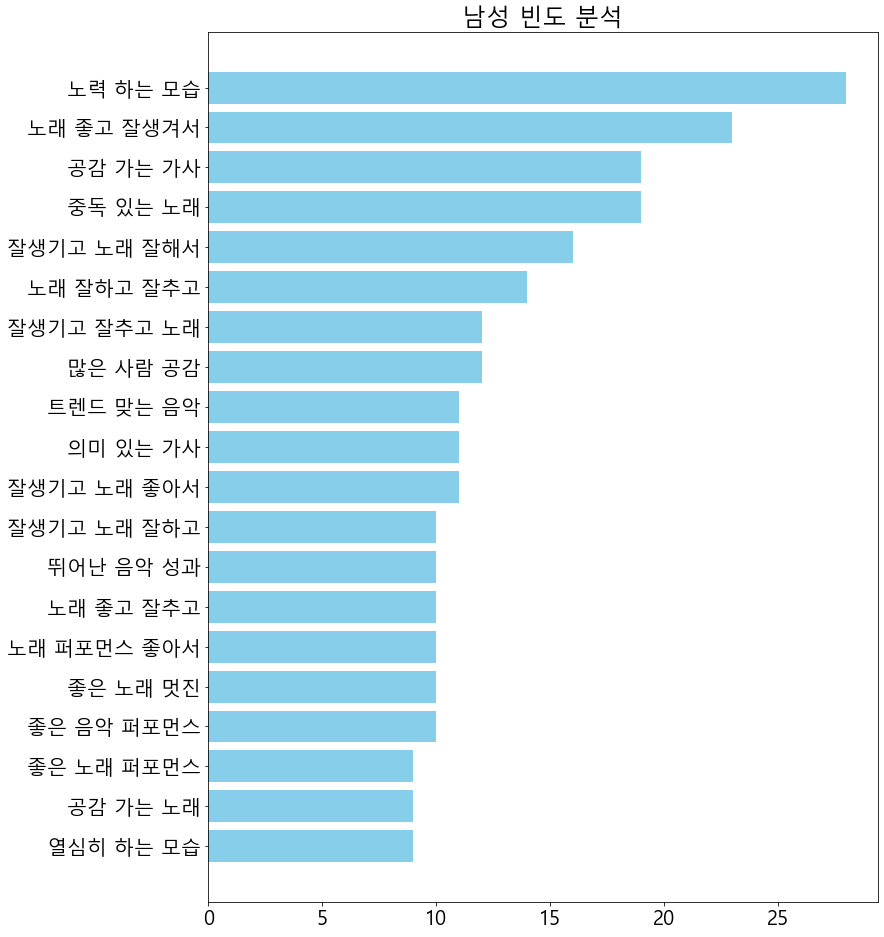

['열심히 노력 해서', '초심 잃지 않고', '대중성 있는 음악', '잘생기고 노래 해서', '노래 좋고 실력', '공감 가는 가사', '노력 하는 그룹', '노래 퍼포먼스 좋아서', '사랑 하는 마음', '노래 좋고 잘생겨서', '항상 노력 하는', '노래 실력 좋아서', '열심히 노력 하는', '노래 좋고 퍼포먼스', '많은 사람 공감', '잘생기고 노래 하고', '노래 하고 잘추고', '중독 있는 노래', '열심히 하는 모습', '노력 하는 모습']
[26, 26, 26, 26, 28, 29, 29, 30, 30, 32, 32, 33, 35, 40, 42, 43, 59, 82, 97, 184]


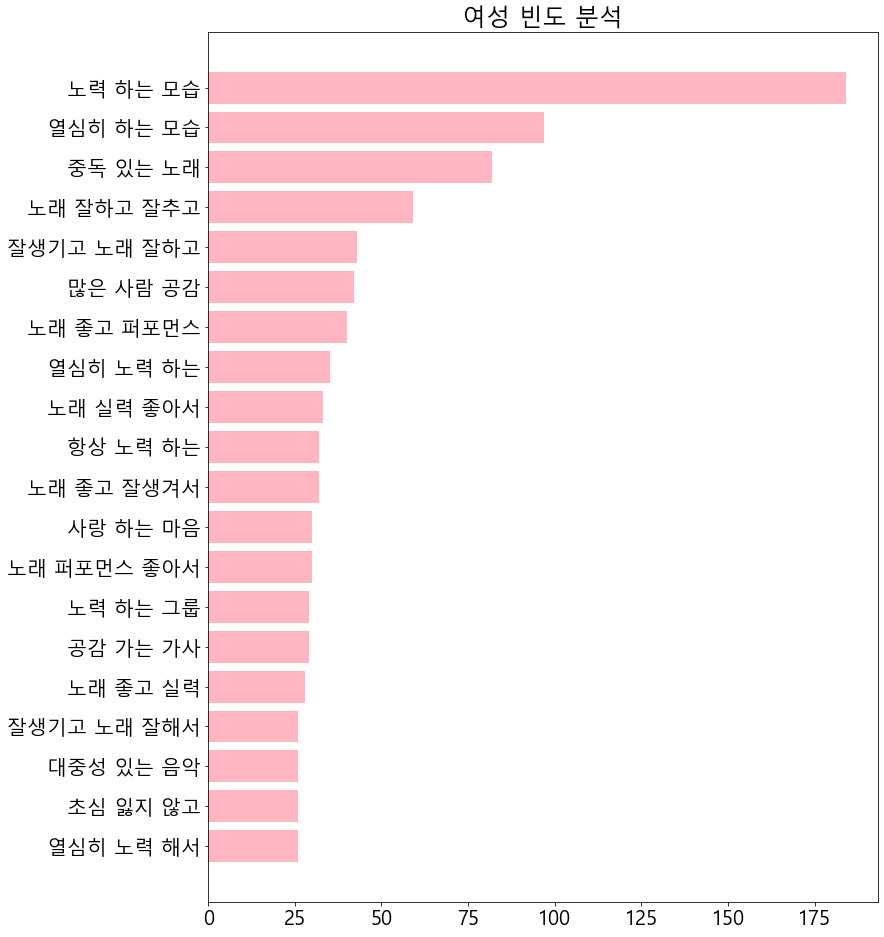

In [174]:
male_word, male_vec = count_analyze(prepro_male, count, 'skyblue', '남성')
female_word, female_vec = count_analyze(prepro_female, count, 'lightpink', '여성')

## 연령대 비교

['공감 가는 가사', '대중성 있는 음악', '초심 잃지 않고', '잘생기고 노래 부르고', '잘생기고 노래 좋아서', '좋은 노래 퍼포먼스', '잘생기고 노래 해서', '열심히 노력 해서', '열심히 노력 하는', '노래 퍼포먼스 좋아서', '노래 실력 좋아서', '노래 좋고 실력', '노래 좋고 퍼포먼스', '많은 사람 공감', '잘생기고 노래 하고', '노래 좋고 잘생겨서', '노래 하고 잘추고', '열심히 하는 모습', '중독 있는 노래', '노력 하는 모습']
[24, 25, 26, 26, 27, 28, 29, 29, 30, 31, 31, 32, 39, 41, 45, 47, 54, 74, 95, 154]


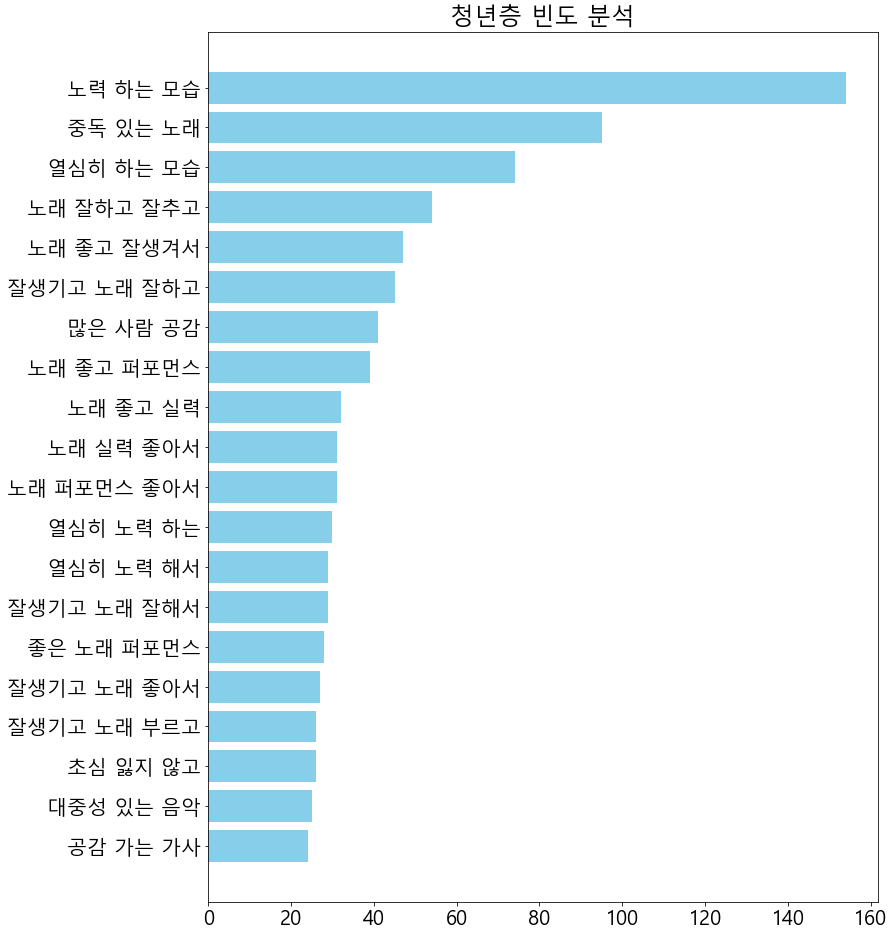

['노래 좋고 잘추고', '공감 하는 노래', '사람 공감 있는', '공감 되는 가사', '의미 있는 가사', '공감 할수 있는', '잘생기고 노래 해서', '공감 있는 노래', '뛰어난 음악 성과', '많은 사람 공감', '열심히 노력 하는', '트렌드 맞는 음악', '노력 하는 그룹', '공감 있는 가사', '항상 노력 하는', '최선 하는 모습', '노래 하고 잘추고', '공감 가는 가사', '열심히 하는 모습', '노력 하는 모습']
[10, 10, 10, 11, 11, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 17, 19, 24, 32, 59]


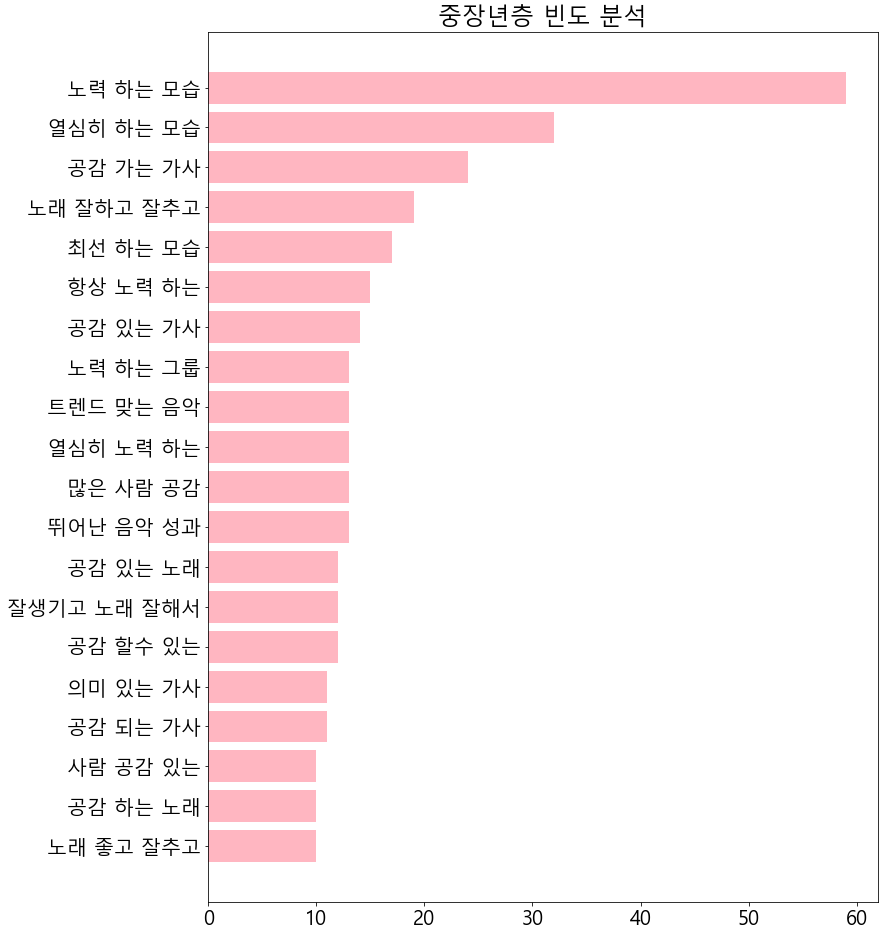

In [178]:
young_word, young_vec = count_analyze(prepro_young, count, 'skyblue', '청년층')
old_word, old_vec = count_analyze(prepro_old, count, 'lightpink', '중장년층')

## 팬클럽 경험 여부

['의미 있는 가사', '작사 작곡 능력', '좋은 노래 퍼포먼스', '사람 공감 있는', '열심히 노력 하는', '실력 좋은 노래', '공감 가는 가사', '노력 하는 그룹', '대중성 있는 음악', '실력 좋고 노래', '중독 있는 음악', '대중성 있는 노래', '노래 좋고 퍼포먼스', '잘생기고 노래 하고', '항상 노력 하는', '노래 하고 잘추고', '많은 사람 공감', '중독 있는 노래', '열심히 하는 모습', '노력 하는 모습']
[13, 13, 13, 14, 14, 14, 15, 15, 15, 15, 15, 16, 18, 21, 21, 22, 22, 45, 48, 85]


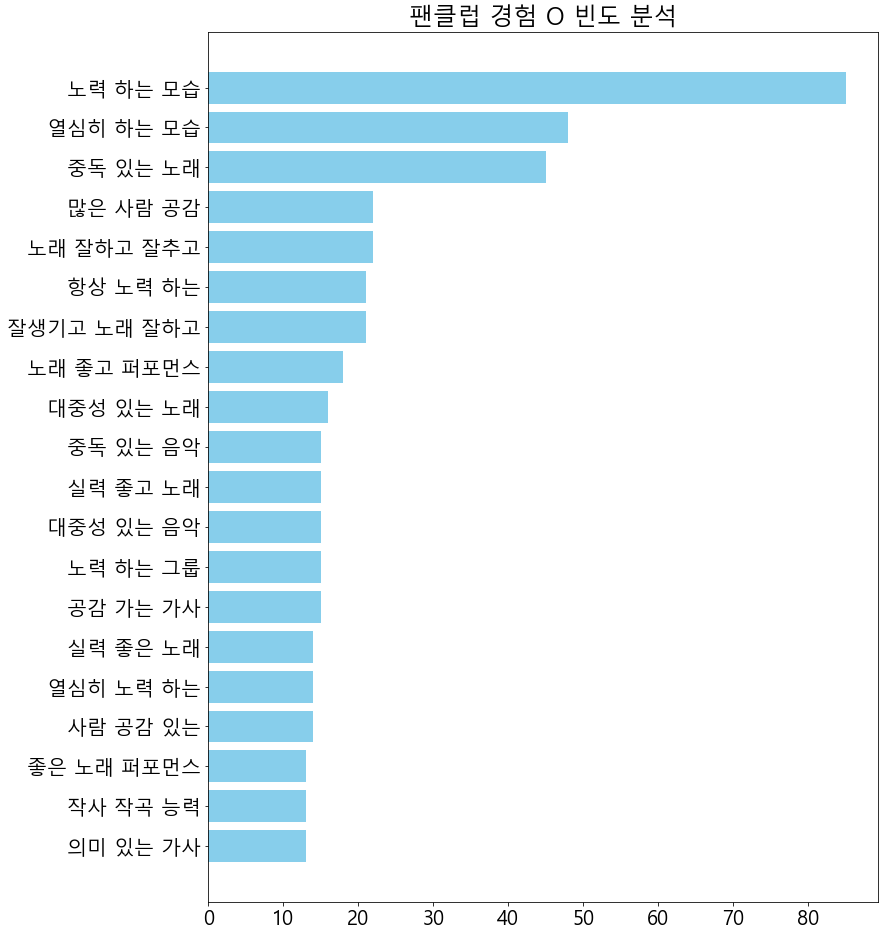

['공감 되는 가사', '최선 하는 모습', '잘생기고 노래 좋아서', '공감 있는 가사', '노래 좋고 실력', '노래 실력 좋아서', '열심히 노력 해서', '노래 좋고 잘추고', '노래 퍼포먼스 좋아서', '노래 좋고 퍼포먼스', '열심히 노력 하는', '많은 사람 공감', '잘생기고 노래 하고', '공감 가는 가사', '잘생기고 노래 해서', '노래 좋고 잘생겨서', '노래 하고 잘추고', '중독 있는 노래', '열심히 하는 모습', '노력 하는 모습']
[18, 20, 21, 23, 23, 25, 26, 27, 29, 29, 29, 32, 32, 33, 33, 42, 51, 56, 58, 128]


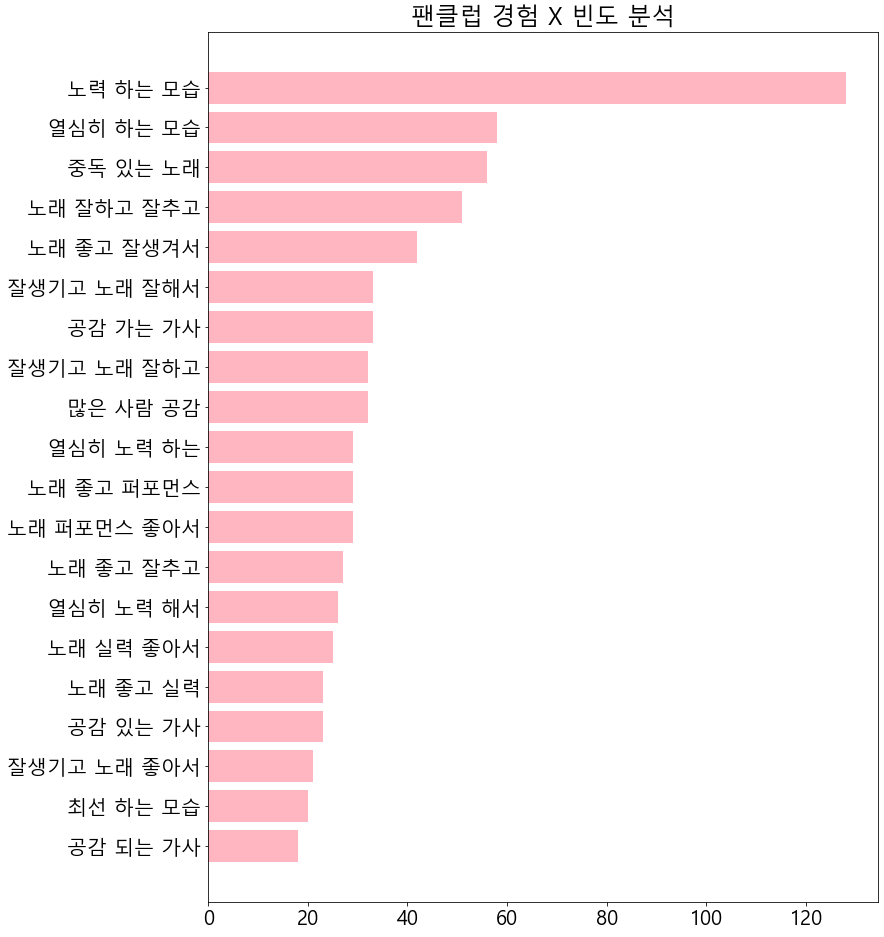

In [180]:
fanclub_word, fanclub_vec = count_analyze(prepro_fanclub, count, 'skyblue', '팬클럽 경험 O')
never_word, never_vec = count_analyze(prepro_never, count, 'lightpink', '팬클럽 경험 X')

## 보이그룹

['멤버 수가 많아', '많이 들어 봐서', '있다고 하기 때문', '다양한 멤버 구성', '많이 들어 그룹', '다양한 국적 멤버', '요즘 뜨는 그룹', '가장 많은 그룹', '대형 기획사 소속', '멤버 수가 많아서']
[5, 5, 5, 6, 7, 8, 8, 8, 9, 9]


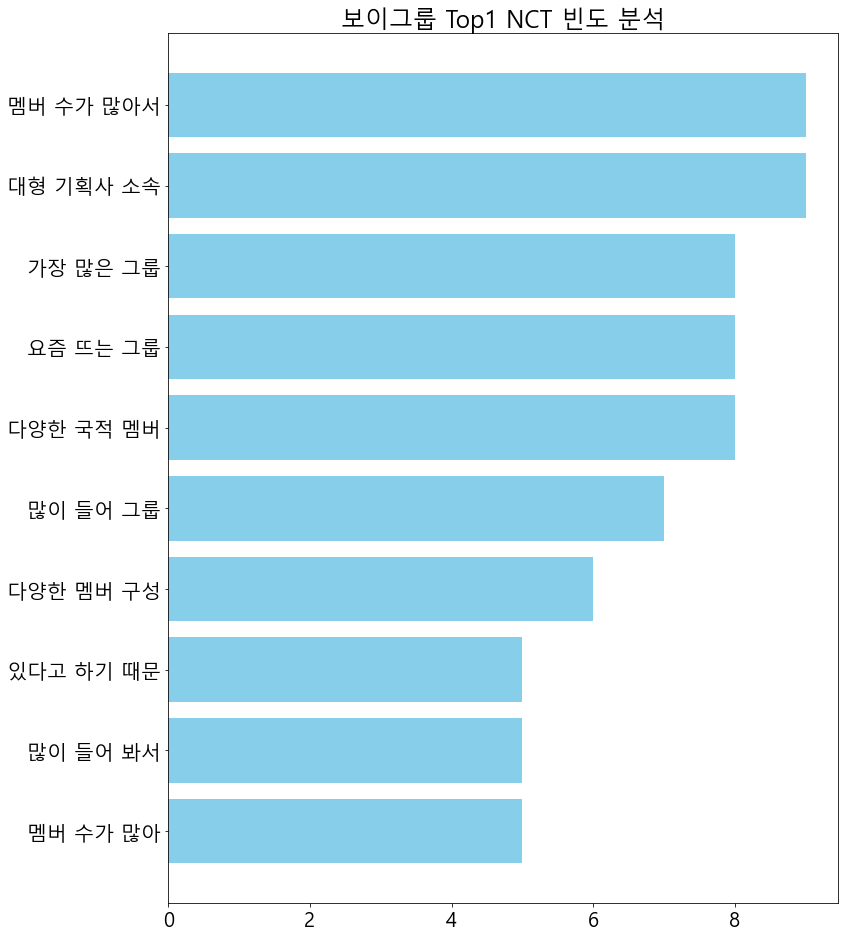

['모든 멤버 실력', '모두 자체 제작', '그룹 자체 제작', '작사 작곡 능력', '실력 좋고 노래', '노래 좋기 때문', '노래 너무 좋다', '직접 작사 작곡', '노력 하는 모습', '작사 작곡 안무']
[3, 4, 4, 4, 4, 5, 5, 5, 7, 12]


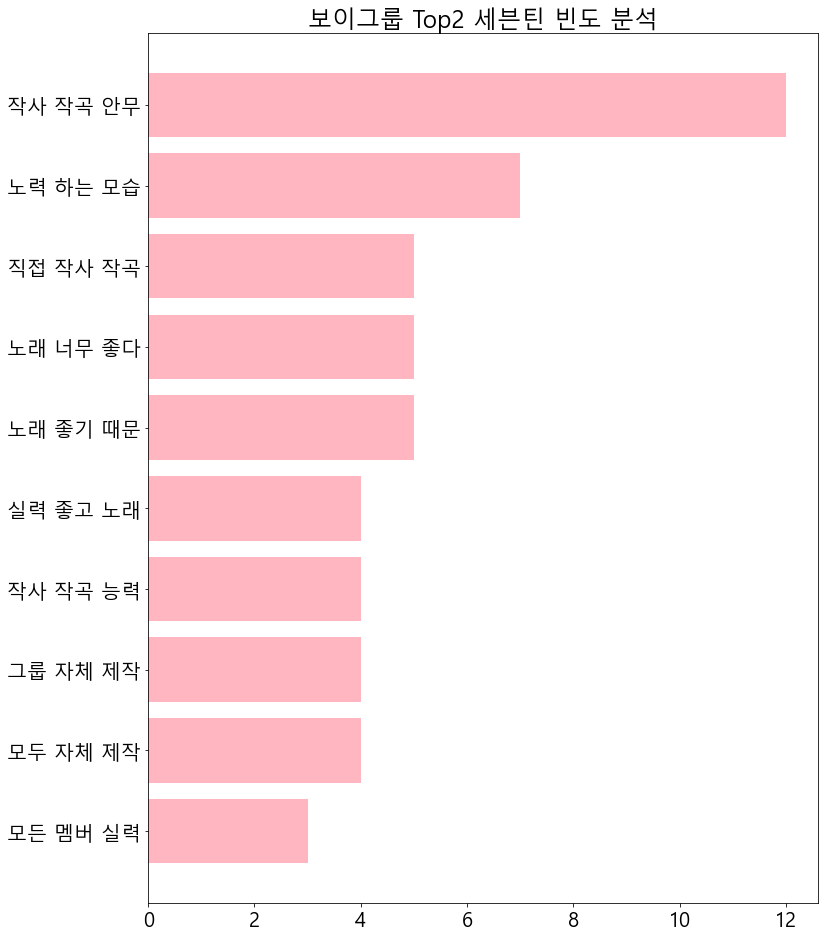

['같은 소속사 방탄', '같은 소속사 노래', '방탄 후배 그룹', '소속사 후배 그룹', '같은 소속사 그룹', '같은 소속사 때문', '방탄소년단 같은 소속사', '방탄 같은 소속사', '같은 소속사 후배', '같은 소속사 같은']
[17, 17, 20, 21, 21, 22, 22, 24, 41, 49]


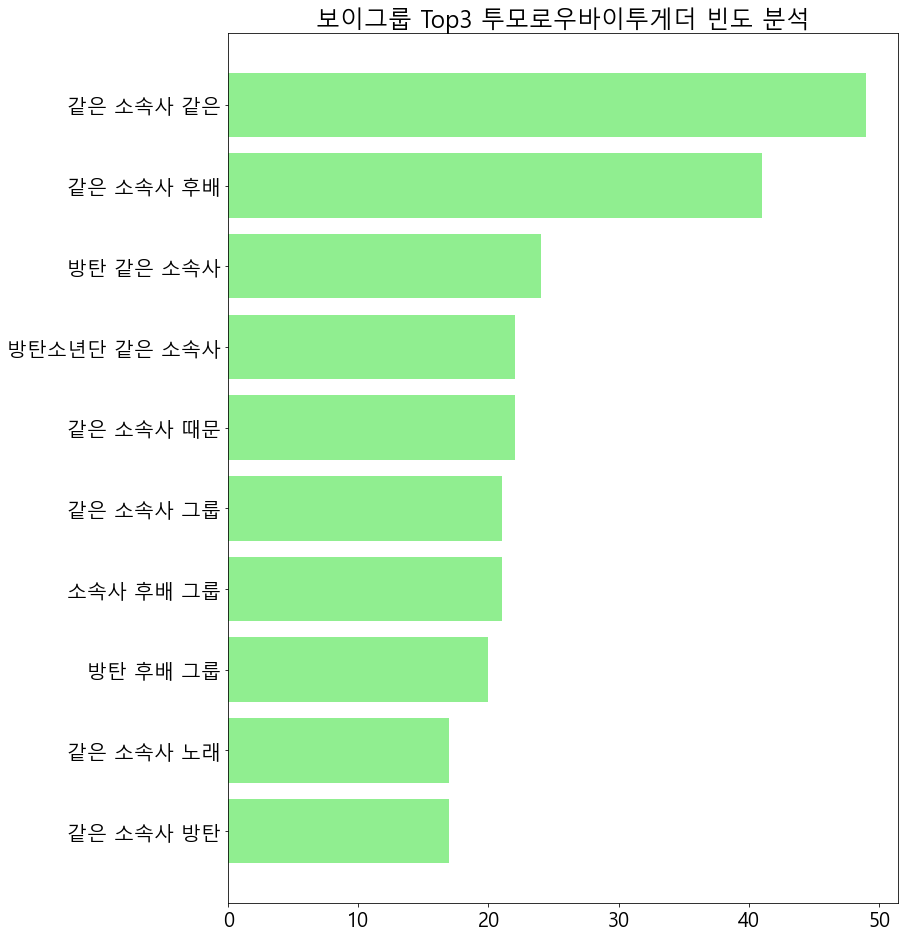

['어워즈 록스 음반', '한창 뜨는 그룹', '실력 좋고 비주', '실력 뛰어난 그룹', '비슷한 느낌 그룹', '잘생기고 노래 좋고', '노래 좋고 멤버', '인지도 높기 때문', '제일 좋아하는 그룹', '좋아하는 그룹 입니다']
[2, 2, 2, 2, 2, 3, 3, 3, 4, 4]


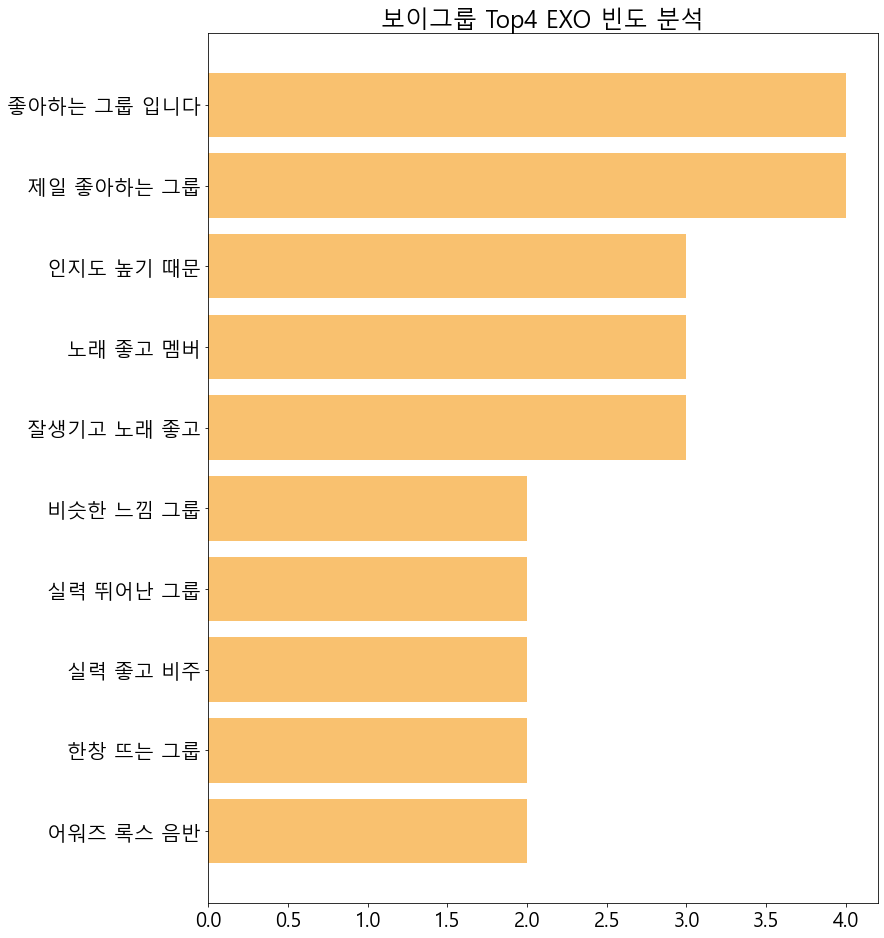

['어느 정도 인지도', '충분한 가능성 있다고', '진출 경험 있고', '제일 좋아하는 그룹', '이미 유명한 그룹', '이미 해외 많다', '멤버 모두 실력', '멤버 간의 케미', '멤버 각자 개성', '해외 많기 때문']
[2, 2, 2, 2, 2, 2, 3, 3, 3, 3]


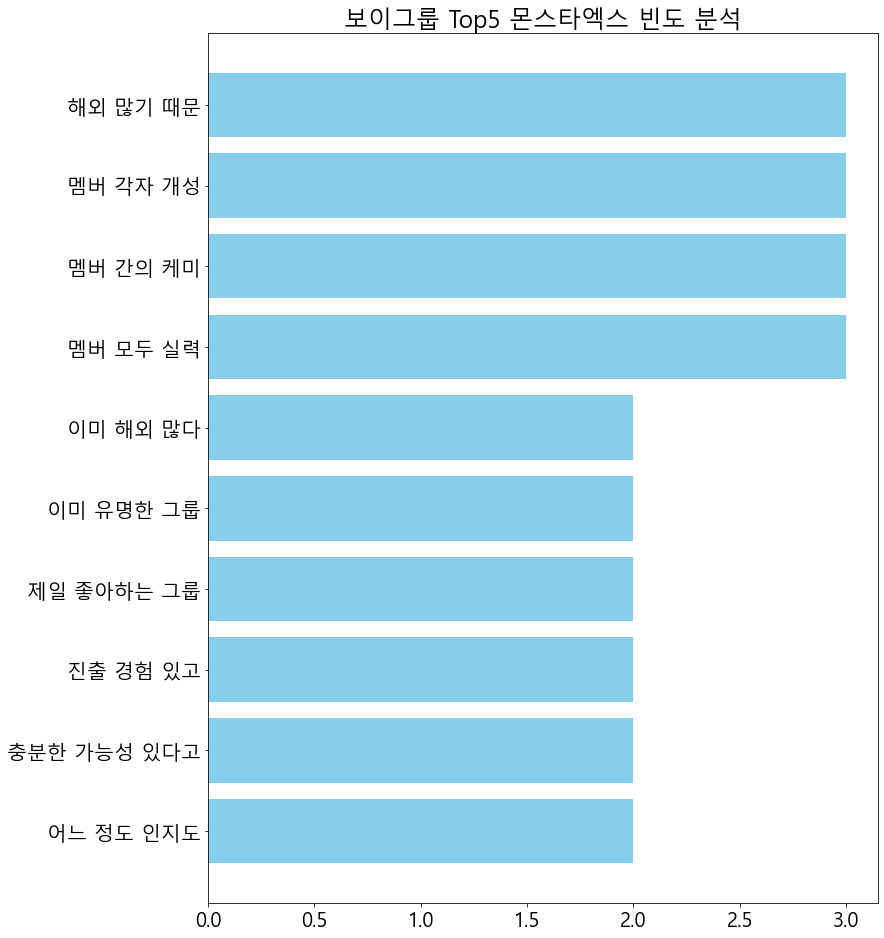

In [200]:
NCT_word, NCT_vec = count_analyze(prepro_NCT, idol_count, 'skyblue', '보이그룹 Top1 NCT')
seven_word, seven_vec = count_analyze(prepro_seven, idol_count, 'lightpink', '보이그룹 Top2 세븐틴')
tomorrow_word, tomorrow_vec = count_analyze(prepro_tomorrow, idol_count, 'lightgreen', '보이그룹 Top3 투모로우바이투게더')
EXO_word, EXO_vec = count_analyze(prepro_EXO, idol_count, '#F9C16F', '보이그룹 Top4 EXO')
monstarX_word, monstarX_vec = count_analyze(prepro_monstarX, idol_count, '#E0B2FC', '보이그룹 Top5 몬스타엑스')

['어느 정도 인지도', '충분한 가능성 있다고', '이미 유명한 그룹', '이미 해외 많고', '이미 해외 많다', '제일 좋아하는 그룹', '멤버 모두 실력', '멤버 간의 케미', '멤버 각자 개성', '해외 많기 때문']
[2, 2, 2, 2, 2, 2, 3, 3, 3, 3]


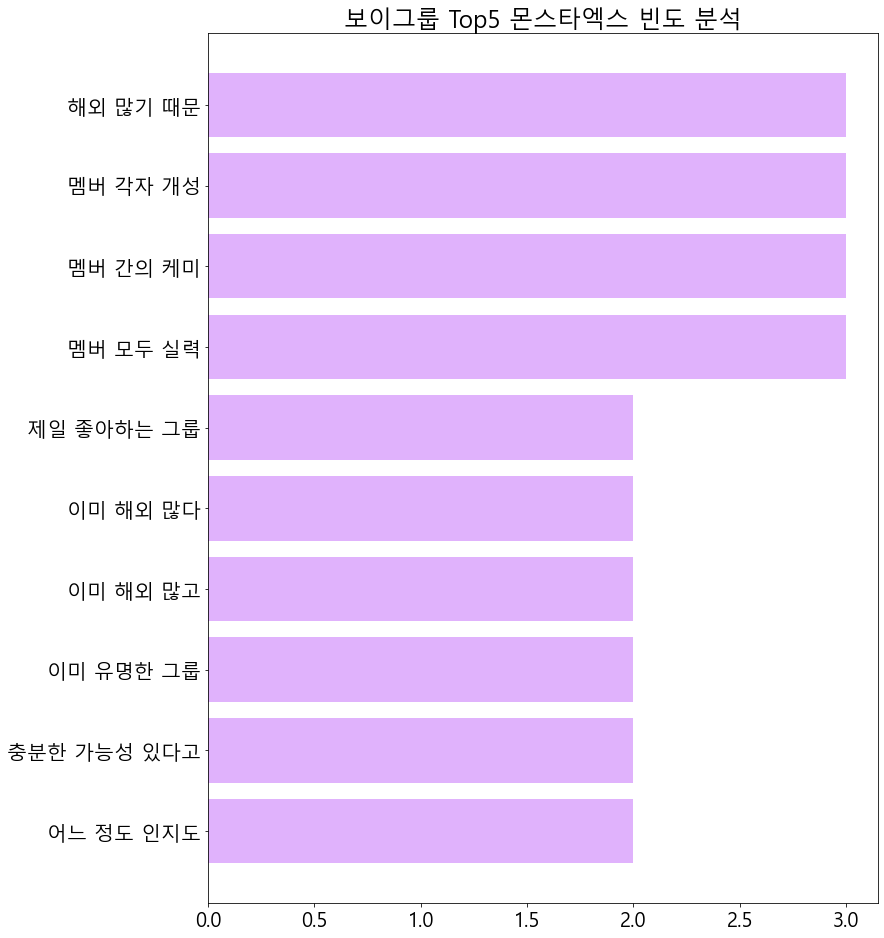

In [216]:
monstarX_word, monstarX_vec = count_analyze(prepro_monstarX, idol_count, '#E0B2FC', '보이그룹 Top5 몬스타엑스')

## 걸그룹

['이미 세계 유명한', '이미 해외 많은', '이미 어느 정도', '세계 유명하기 때문', '이미 해외 인지도', '이미 세계 인지도', '해외 많기 때문', '유튜브 조회 수가', '이미 세계 그룹', '많은 사랑 받고']
[20, 20, 21, 21, 21, 23, 26, 29, 37, 37]


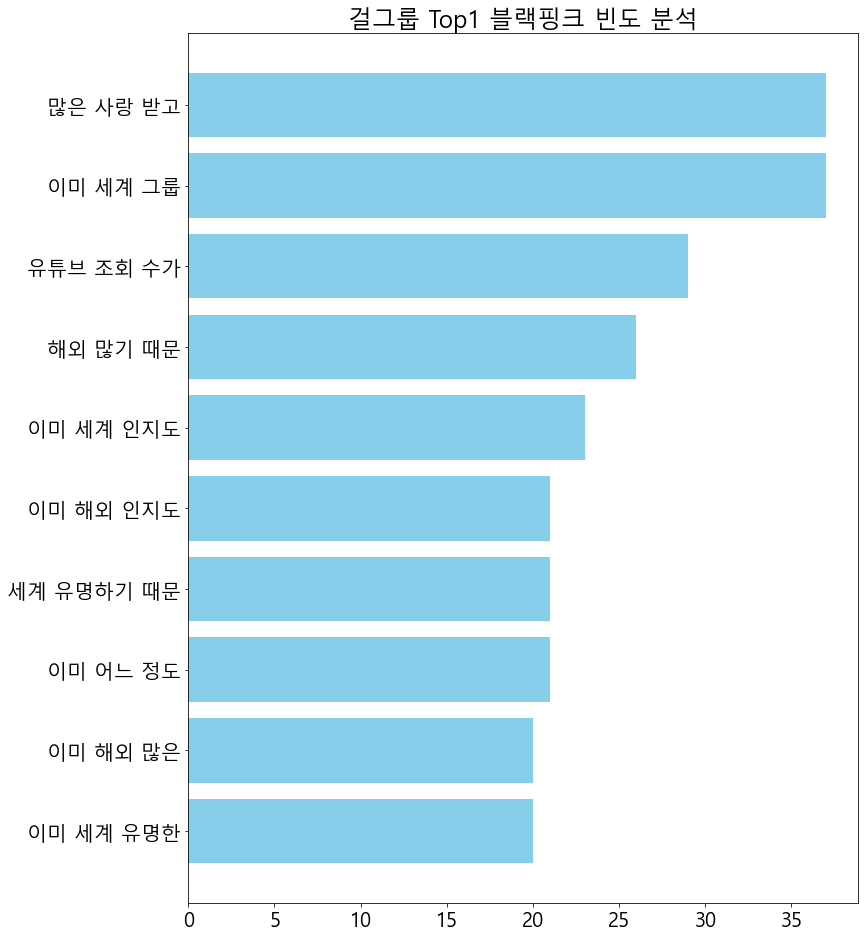

['중독 강한 노래', '메타 버스 이용', '메타 버스 세계관', '요즘 뜨고 있어서', '넥스트 레벨 노래', '대형 기획사 소속', '노래 중독 있다', '노래 중독 있음', '노래 중독 있어서', '데뷔 한지 얼마']
[8, 8, 9, 9, 11, 12, 12, 13, 15, 23]


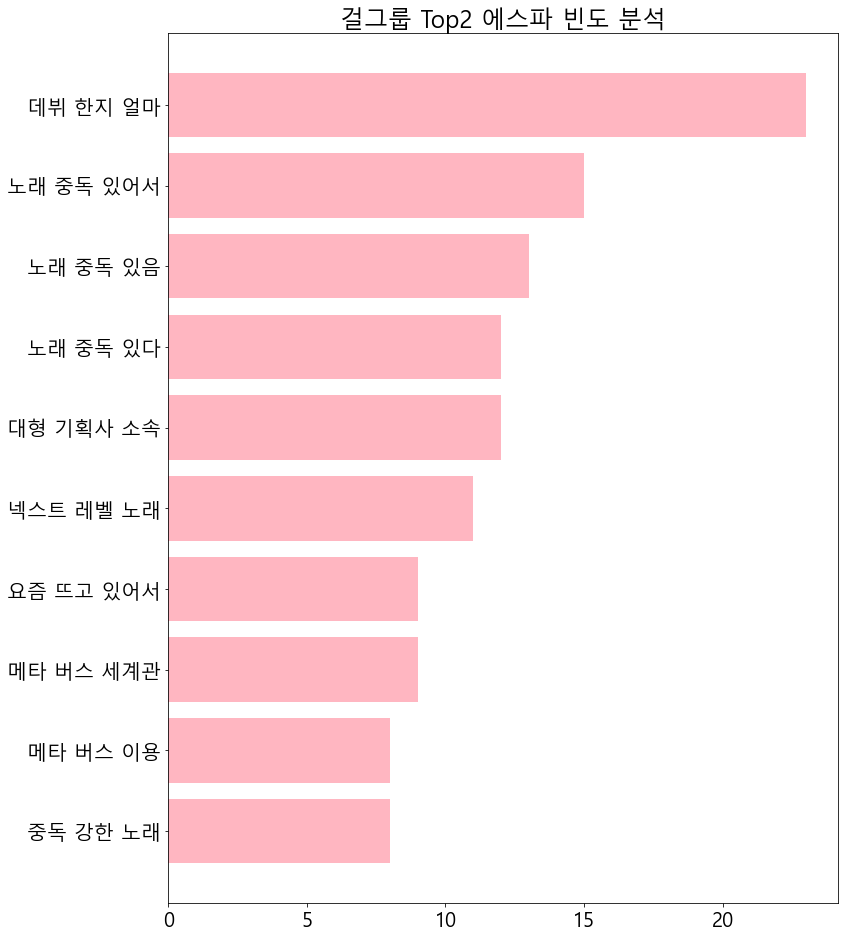

['선호 하는 스타일', '실력 뛰어나기 때문', '실력 좋기 때문', '톡톡 튀는 매력', '요즘 뜨는 그룹', '중독 있다 멤버', '예쁘고 잘추고 노래', '데뷔 한지 얼마', '중독 강한 노래', '가능성 있어 보임']
[2, 2, 2, 2, 2, 2, 2, 3, 3, 4]


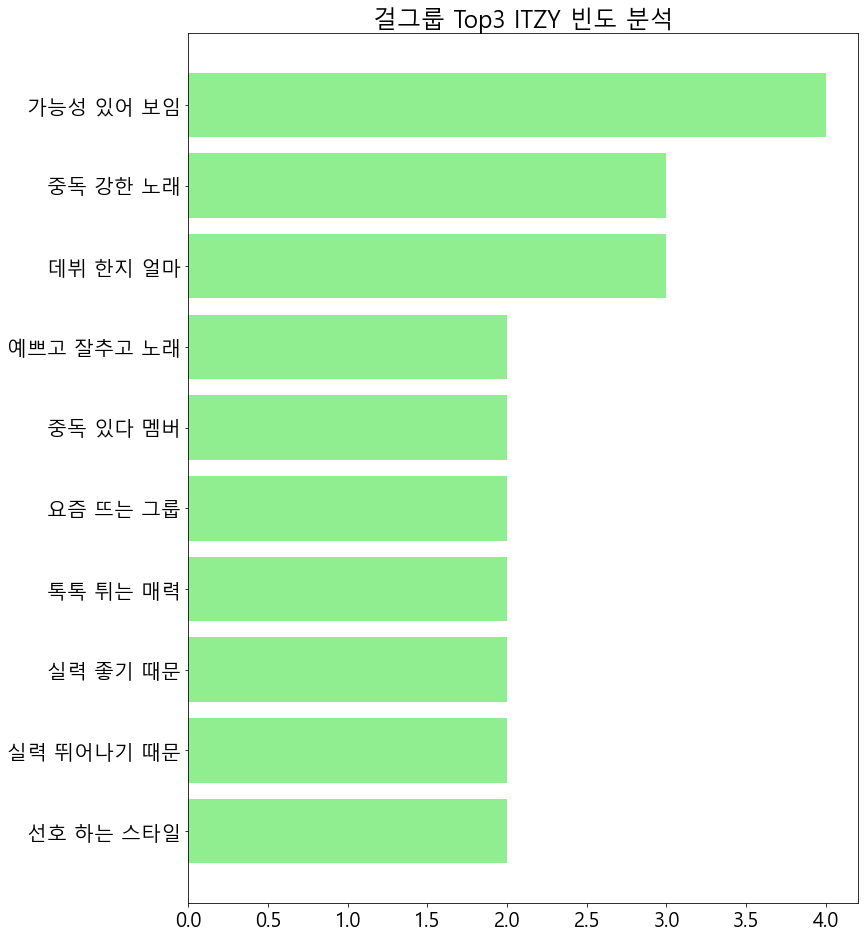

['충분히 가능성 있다고', '통통 튀는 매력', '트와이스 노래 많이', '트와이스 노래 좋아서', '각자 개성 있음', '멤버 각자 매력', '많이 들어 봐서', '많은 사랑 받고', '다양한 국적 멤버', '이쁘고 노래 좋아서']
[2, 2, 2, 2, 2, 3, 3, 3, 3, 4]


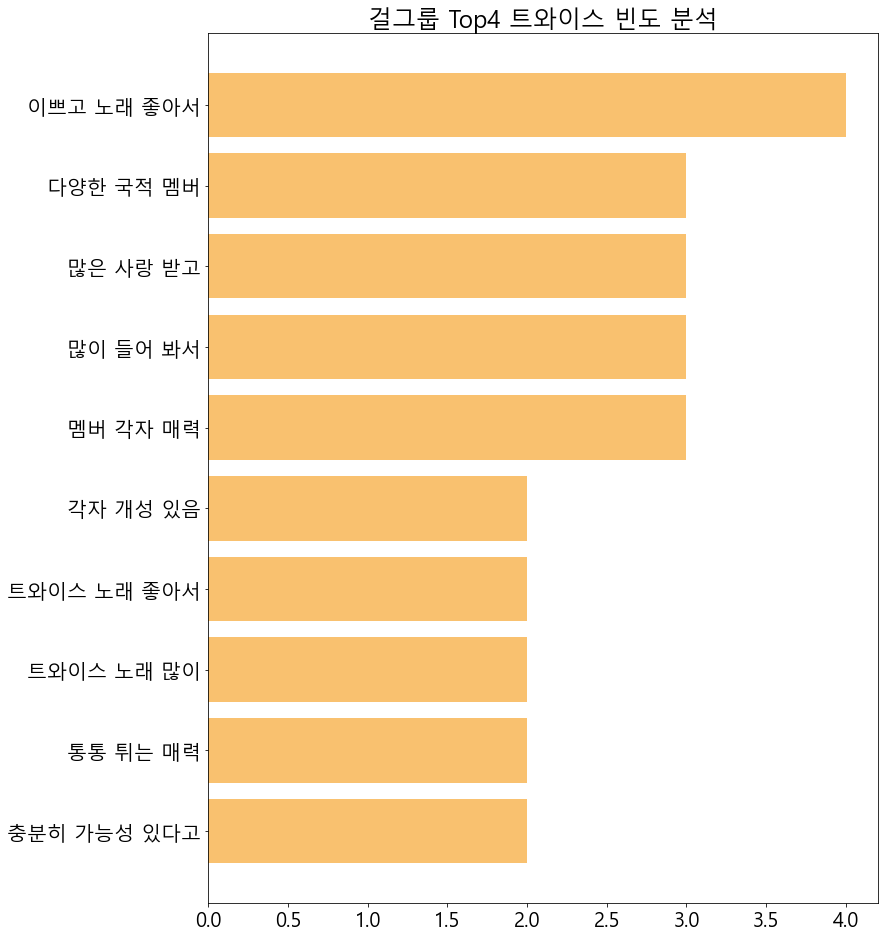

['실력 너무 좋아서', '실력 뛰어나고 무대', '톡톡 튀는 매력', '최선 하는 모습', '일반 다른 매력', '하는 모습 때문', '노래 너무 해서', '노래 너무 좋음', '가창력 무대 장악', '가창력 무대 매너']
[2, 2, 2, 2, 2, 2, 3, 3, 3, 3]


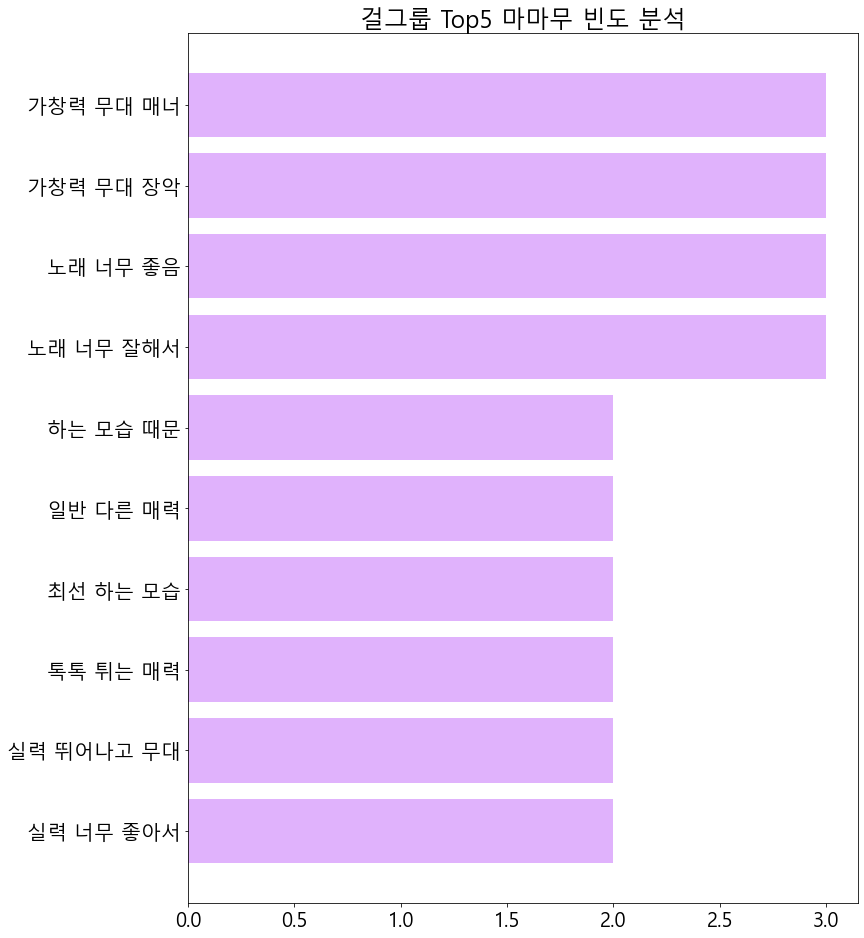

In [217]:
blackpink_word, blackpink_vec = count_analyze(prepro_blackpink, idol_count, 'skyblue', '걸그룹 Top1 블랙핑크')
espa_word, espa_vec = count_analyze(prepro_espa, idol_count, 'lightpink', '걸그룹 Top2 에스파')
ITZY_word, ITZY_vec = count_analyze(prepro_ITZY, idol_count, 'lightgreen', '걸그룹 Top3 ITZY')
twice_word, twice_vec = count_analyze(prepro_twice, idol_count, '#F9C16F', '걸그룹 Top4 트와이스')
mamamu_word, mamamu_vec = count_analyze(prepro_mamamu, idol_count, '#E0B2FC', '걸그룹 Top5 마마무')